In [ ]:
!mkdir drive/MyDrive/noisy_images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import random
import torch
import numpy as np
from skimage.util import random_noise
import os
from tqdm import tqdm

In [ ]:
def xeroxFilter(imgPath, colorSpaceReduction=100, rotate=False, fillColor=(255,255,255)):
  '''Takes image as input and returns a xerox like image of the input image.
  impPath: Name of Image(keep the images in the same folder as this script)
  colorSpaceReduction:  Reducing the color space. Higher the value, Higher the reduction. 
  rotate: Rotate to the image
  fillColor: Specify the RGB value of the background color after roatation
  '''
  print("Original Image")
  #cv2_imshow(cv2.imread(imgPath))

  print('GreyScale')
  #cv2_imshow(cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE))
  
  print('Color Space Reduced')
  color_reduced_img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE) // colorSpaceReduction * colorSpaceReduction + colorSpaceReduction // 2
  cv2_imshow(color_reduced_img)
  #file_name = 'ColorSpaceReduced.png'
  #cv2.imwrite(file_name, color_reduced_img)

In [ ]:
xeroxFilter('/content/pdf2img/content/pdf2img/0.tiff')

Original Image
GreyScale
Color Space Reduced


TypeError: ignored

In [ ]:
# Load the image
img = cv2.imread("drive/MyDrive/pdf2img/0.tiff", cv2.IMREAD_GRAYSCALE )
print(img.shape)

(1000, 800)


In [ ]:
# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='salt',amount=0.1)
noise_img = np.array(255*noise_img, dtype = 'uint8')
#filename = 'test'
#cv2.imwrite('/content/test.png',noise_img)

In [ ]:
# Add salt-and-pepper noise to the image.
noise_img_1 = random_noise(img, mode='salt', amount = 0.1)
noise_img_1 = np.array(255*noise_img_1, dtype = 'uint8')
#cv2.imwrite('/content/test.png',noise_img_1)

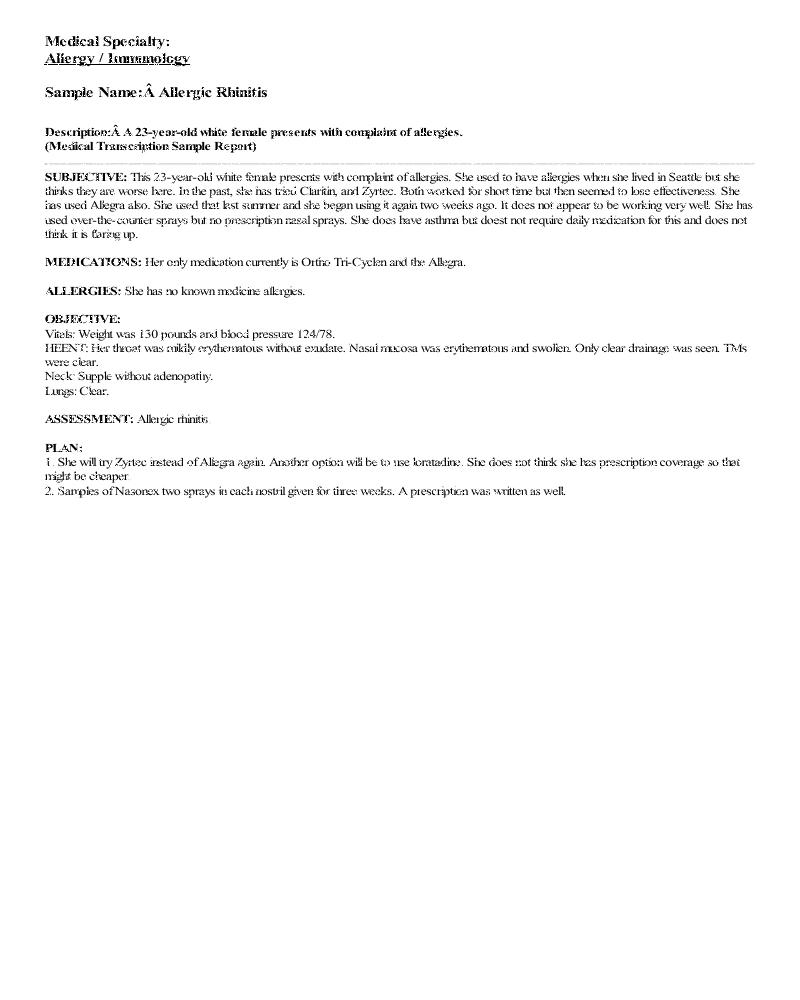

In [ ]:
cv2_imshow(noise_img)

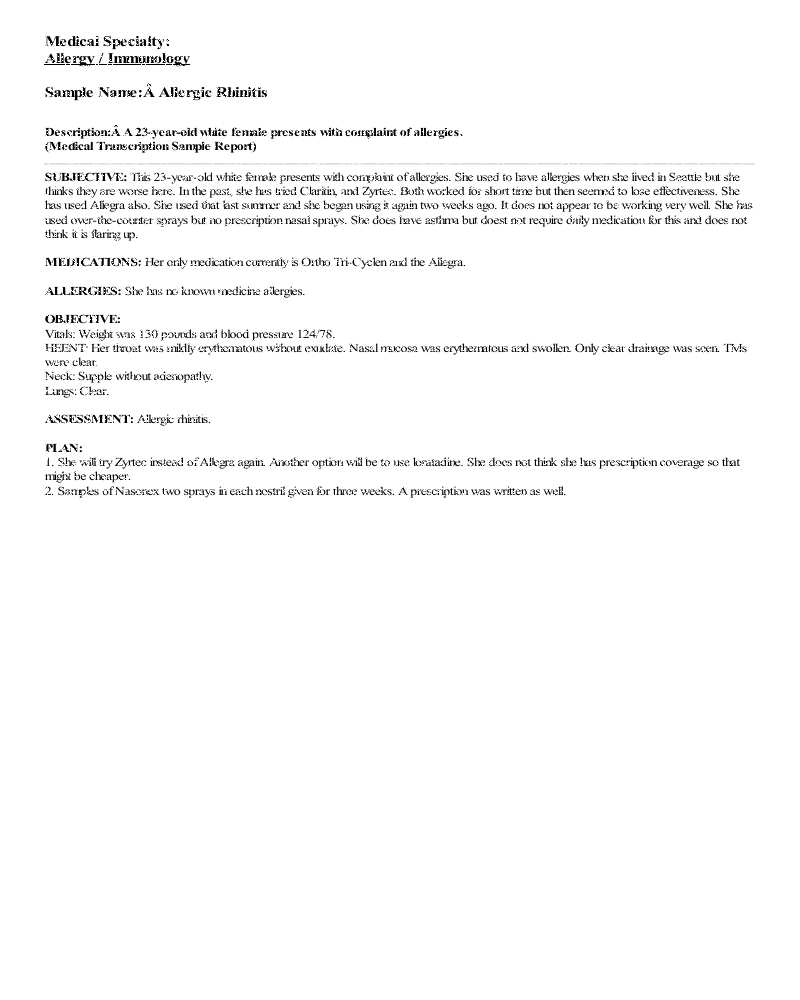

In [ ]:
cv2_imshow(noise_img_1)

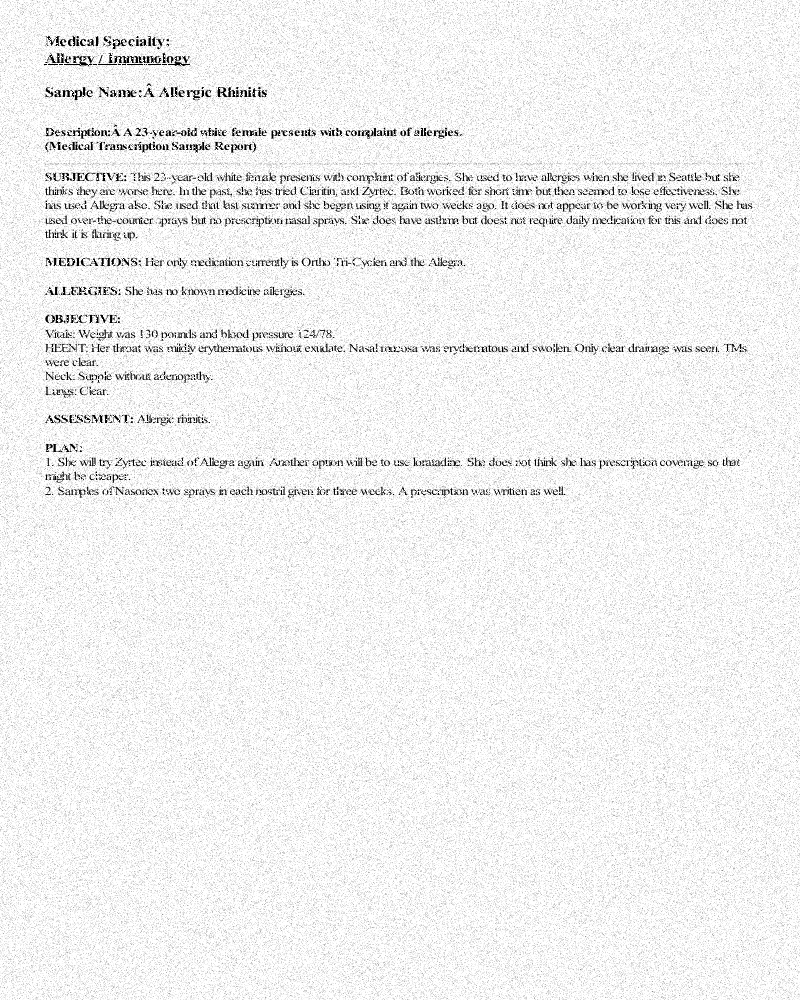

In [ ]:
cv2_imshow(noise_img_2)

In [ ]:
#!sudo apt install tesseract-ocr
! pip install pytesseract

In [ ]:
import pytesseract

In [ ]:
pytesseract.image_to_string("/content/test.png")

'Medical Specialty:\nAllergy / Unsramnology\n\nSample Name:A Allergic Rhinitis\n\n \n\nDescriptions’, A 23-year-old shite fernuie preseuls with complaint of allergies.\n(Medical Transcription Sample Report)\n\nSUBJECTIVE: Ths 23-year-old white ermak: presents with compli of allergies. She used to have allorgios when she ved in Seattke buat she\nthinks they are worse tere. Inthe pas, she has ted Clartin, and Zyrtec. Both worked fr shor time but then seetnd :0 lose effectioness. She\nTas used Allegra oso, She used dt ast suzmer and she began asing it amin han weeks ago, Wtdoss not anpear to be working very well. Sbe fs\nsed over-the-counter sprays but no preseriptinn sesal sprays. She docs have asthumm hut doest not equte daily wedicadion for ths and Joes not\nthink its arn up.\n\n \n\n \n\nMEDICATIONS: ier only nedication curcetly is Ordo ‘Th-Cyelen and ti Allegra,\n\nALLERGIES: Shi: has 90 known medicine allergies\n\n \n\nORJECTIM\nVis: Weigh was 130 pours and blood pressure 124/78,\n\

In [ ]:
#0 --> s&p
#1 --> localvar
#2 --> salt & speckle
#3 --> salt
#4 --> speckle

In [ ]:
for filename in tqdm(os.listdir('drive/MyDrive/pdf2img')):

  #light pepper
  if filename.split('.')[0].endswith('0'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img = random_noise(img, mode='s&p',amount=0.005)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img)

  #heavy pepper  
  elif filename.split('.')[0].endswith('1'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img = random_noise(img, mode='speckle')
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img)

  #light salt
  elif filename.split('.')[0].endswith('2'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img = random_noise(img, mode='salt',amount=0.05)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img)

  #heavy salt
  elif filename.split('.')[0].endswith('3'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img = random_noise(img, mode='salt',amount=0.1)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img)

  #light salt and pepper
  elif filename.split('.')[0].endswith('4'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img_1 = random_noise(img, mode='salt', amount = 0.05)
    noise_img_1 = np.array(255*noise_img_1, dtype = 'uint8')
    noise_img_2 = random_noise(noise_img_1, mode='s&p', amount=0.005)
    noise_img_2 = np.array(255*noise_img_2, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img_2)

  #heavy salt and pepper
  elif filename.split('.')[0].endswith('5'):
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    noise_img = random_noise(img, mode='localvar')
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), noise_img)

  else:
    img = cv2.imread(os.path.join("drive/MyDrive/pdf2img", filename), cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(os.path.join('drive/MyDrive/noisy_images', filename), img)

In [ ]:
l = []
for filename in tqdm(os.listdir('/content/noisy_images')):
  l.append(filename)

100%|██████████| 3503/3503 [00:00<00:00, 435247.41it/s]


In [ ]:
len(l)

3503

In [ ]:
! zip -r /content/noisy_images.zip /content/noisy_images